In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict
from spacy.util import minibatch
from spacy.util import compounding
import spacy
import os
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objs as go
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


In [4]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
pio.renderers.default = "notebook_connected"


In [6]:
!ls /fp/projects01/ec307/ec-krimhau/jira_datasets/

highest_high_vs_low_lowest_balanced_jira.csv	high_highest_vs_rest
highest_vs_lowest_balanced_jira.csv		high_vs_rest
highest_vs_rest_balanced_jira.csv		jira_clean_with_all_cols.csv
highest_vs_rest_min_len_25th_balanced_jira.csv


In [7]:
file_name = "highest_vs_lowest_balanced_jira.csv"
path_name = "/fp/projects01/ec307/ec-krimhau/jira_datasets"
full_name = f"{path_name}/{file_name}"

In [8]:
import pandas as pd
df = pd.read_csv(full_name, index_col=0)
df

,text
label,
0,testing on version discovered test case does a...
1,description this is an issue found when use co...
0,description since unixtimestamp udf was deprec...
0,in programmming guides most algos in ml have l...
1,creation of system eventqueue was commented ou...
...,...
1,seems to have introduced a bug because of whic...
1,copying s comment from mailing list on head wi...
0,add ability to merge multiple listsmapssets th...


In [9]:
# Drop NaN values and reset index of dataframe
df = df[df['text'].notna()]
df = df.reset_index()

In [10]:
df


,label,text
0,0,testing on version discovered test case does a...
1,1,description this is an issue found when use co...
2,0,description since unixtimestamp udf was deprec...
3,0,in programmming guides most algos in ml have l...
4,1,creation of system eventqueue was commented ou...
...,...,...
64981,1,seems to have introduced a bug because of whic...
64982,1,copying s comment from mailing list on head wi...
64983,0,add ability to merge multiple listsmapssets th...
64984,0,rename asterixjavaclient to asterixtestclient


In [11]:
df["label"].value_counts()

label
0    32493
1    32493
Name: count, dtype: int64

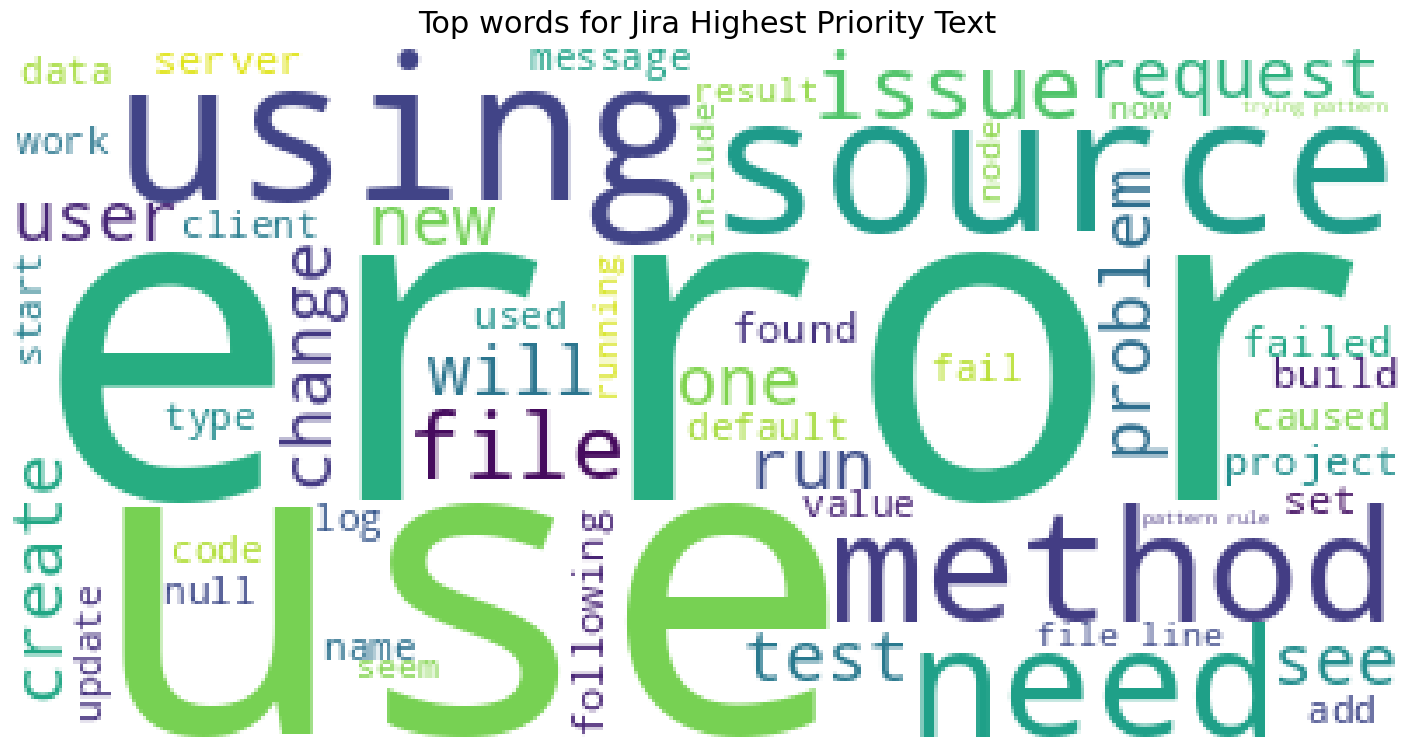

In [12]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


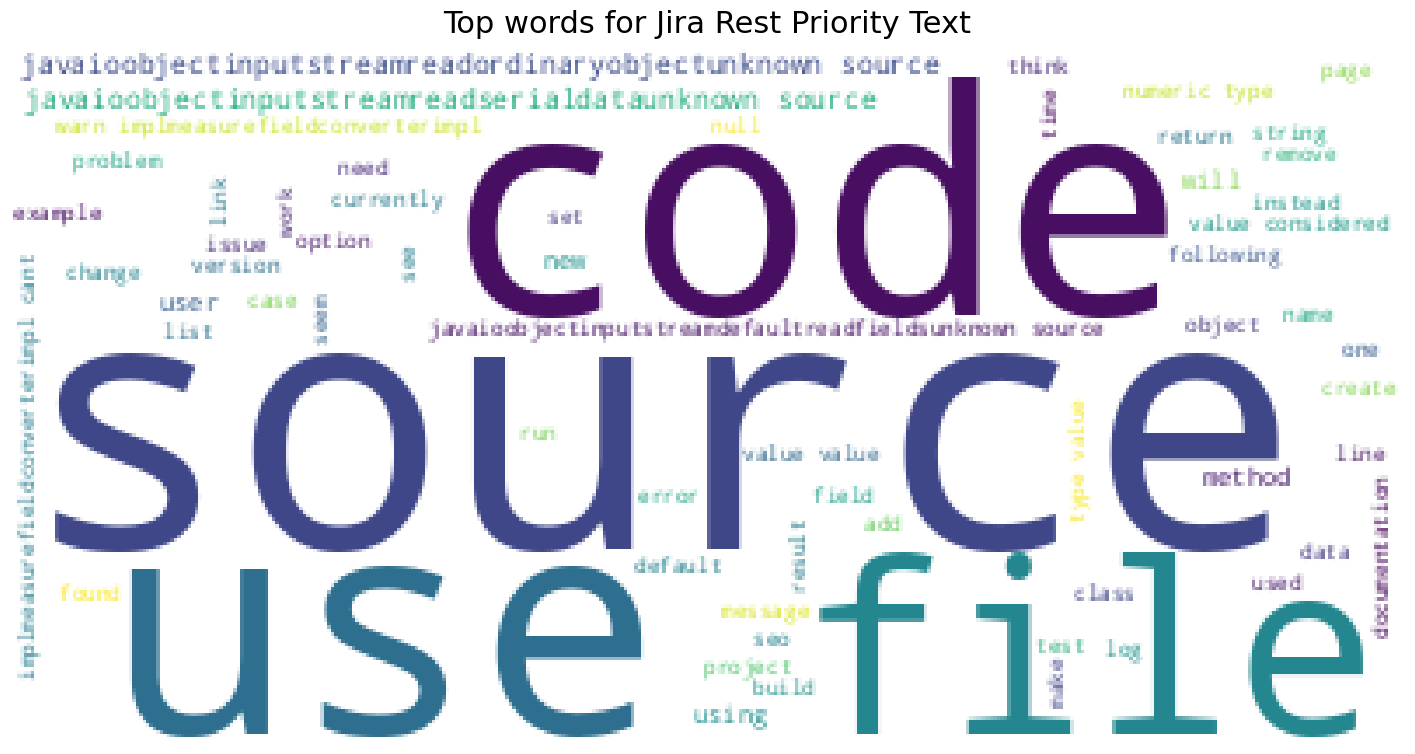

In [13]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Rest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [14]:
top_debt_words = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))


In [15]:
top_debt_words.words_

{'error': 1.0,
 'use': 0.964853243596934,
 'using': 0.8850252383623107,
 'source': 0.8450177603290334,
 'method': 0.8364180220601982,
 'need': 0.8266965787997756,
 'issue': 0.7793980183211815,
 'file': 0.769676575060759,
 'request': 0.7257431295569265,
 'test': 0.7238736212376146,
 'will': 0.6937745372966909,
 'user': 0.6728360441203963,
 'one': 0.6498410917928584,
 'new': 0.6483454851374089,
 'see': 0.6210506636754534,
 'problem': 0.6111422695830997,
 'create': 0.5905776780706674,
 'change': 0.5896429239110114,
 'run': 0.5830996447934194,
 'project': 0.5806692839783137,
 'set': 0.5640306599364368,
 'server': 0.5601046924658815,
 'failed': 0.5436530192559357,
 'build': 0.5382314451299308,
 'found': 0.533744625163582,
 'following': 0.5279491493737147,
 'code': 0.4774724247522901,
 'type': 0.4761637689287717,
 'used': 0.4752290147691157,
 'fail': 0.4748551131052533,
 'start': 0.4679379323237988,
 'add': 0.4664423256683492,
 'caused': 0.4455038324920546,
 'name': 0.444008225836605,
 'defa

In [16]:
top_debt_words_0 = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))


In [17]:
top_debt_words_0.words_

{'source': 1.0,
 'code': 0.7513890867644963,
 'use': 0.7411312152728309,
 'file': 0.6802963385097592,
 'javaioobjectinputstreamreadordinaryobjectunknown source': 0.6147599373130076,
 'javaioobjectinputstreamreadserialdataunknown source': 0.6117680581279384,
 'method': 0.5295626157572304,
 'will': 0.4985040604074655,
 'using': 0.46787291636985323,
 'user': 0.45391081350619744,
 'new': 0.4506339934463599,
 'javaioobjectinputstreamdefaultreadfieldsunknown source': 0.437811654081778,
 'one': 0.43453483402194043,
 'add': 0.413734150163841,
 'set': 0.41017238922923493,
 'test': 0.39820487248895853,
 'need': 0.37028066676164695,
 'error': 0.3677161988887306,
 'used': 0.36258726314289785,
 'example': 0.35988032483259724,
 'change': 0.3570309160849124,
 'name': 0.35418150733722753,
 'class': 0.3493375124661633,
 'issue': 0.3318136486679014,
 'see': 0.32768200598375835,
 'create': 0.32298048155007836,
 'version': 0.3147171961817923,
 'object': 0.31015814218549653,
 'instead': 0.300470152443368,


In [18]:
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()


,label,text,text_len
0,0,testing on version discovered test case does a...,154
1,1,description this is an issue found when use co...,241
2,0,description since unixtimestamp udf was deprec...,42
3,0,in programmming guides most algos in ml have l...,25
4,1,creation of system eventqueue was commented ou...,24


In [19]:
# Assuming 'text_len' is already calculated as shown previously
description = df['text_len'].describe()

# Applying formatting to make numbers more readable
formatted_description = description.apply(lambda x: f"{x:,.0f}")
print(formatted_description)

count    64,986
mean         75
std         351
min           1
25%          22
50%          43
75%          82
max      62,984
Name: text_len, dtype: object


In [20]:
df['text_len'].describe()

count    64986.000000
mean        74.969963
std        350.877165
min          1.000000
25%         22.000000
50%         43.000000
75%         82.000000
max      62984.000000
Name: text_len, dtype: float64

In [21]:
balance_counts = df.groupby('label')['label'].agg('count').values
balance_counts


array([32493, 32493])

In [22]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Non-'],
    y=[balance_counts[0]],
    name='Non-TD',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['TD'],
    y=[balance_counts[1]],
    name='TD',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by label</span>'
)
fig.show()


In [23]:
Non_df = df[df['label'] == 0]['text_len'].value_counts().sort_index()
df1 = df[df['label'] == 1]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Non_df.index,
    y=Non_df.values,
    name='Rest',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1.values,
    name='Highest Priority',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message length</span>'
)
fig.update_xaxes(range=[0, 300])
fig.show()


In [24]:
from nltk.util import ngrams
from plotly import tools
import plotly.offline as py
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /fp/homes01/u01/ec-
[nltk_data]     krimhau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
#Gram analysis on Training set- Bigram and Trigram
stopword = set(stopwords.words('english'))


def gram_analysis(data, gram):
    tokens = [t for t in data.lower().split(
        " ") if t != "" if t not in stopword]
    ngrams = zip(*[tokens[i:] for i in range(gram)])
    final_tokens = [" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data, grams):
    freq_dict = defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence, grams):
            freq_dict[tokens] += 1
    return freq_dict


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace


def create_new_df(freq_dict,):
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda z: z[1])[::-1])
    freq_df.columns = ['n_gram_words', 'n_gram_frequency']
   
    trace = horizontal_bar_chart(freq_df[:20], 'orange')
    return trace


def plot_grams(trace_zero, trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of Non_TD ",
                                              "Frequent words of TD"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900,
                         paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')


In [26]:
df_zero = df[df['label'] == 0]
df_ones= df[df['label'] == 1]

In [27]:
print("Bi-gram analysis")
freq_df_zero=create_dict(df_zero["text"],2)

Bi-gram analysis


In [28]:
trace_zero = create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 2)
trace_ones = create_new_df(freq_df_ones)


In [29]:
plot_grams(trace_zero, trace_ones)


/fp/homes01/u01/ec-krimhau/.local/lib/python3.11/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [30]:
print("Tri-gram analysis")
freq_df_zero = create_dict(df_zero["text"], 3)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 3)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)

Tri-gram analysis
